In [ ]:
import pandas as pd

df = pd.read_csv('world.csv')
df.head()

In [ ]:
df.info()

In [3]:
df.tail()

,ID,iso_code,洲名,國家,日期,總確診數,新增確診數,七天移動平均新增確診數,總死亡數,新增死亡數,...,七天移動平均疫苗新增接種劑數,每百人接種疫苗劑數,每百人接種疫苗人數,疫情控管指數,總人口數,中位數年紀,70歲以上人口比例,平均壽命,解除隔離數,解封指數
187880,187881,ZWE,非洲,辛巴威,2022-07-02,255586,0,39.571,5555,0,...,6190.0,79.41,41.81,0.0,15092171,19.6,1.882,61.49,0,99999.0
187881,187882,ZWE,非洲,辛巴威,2022-07-03,255586,0,33.000,5555,0,...,8710.0,79.55,41.86,0.0,15092171,19.6,1.882,61.49,0,99999.0
187882,187883,ZWE,非洲,辛巴威,2022-07-04,255726,140,49.000,5558,3,...,10797.0,79.67,41.90,0.0,15092171,19.6,1.882,61.49,0,99999.0
187883,187884,ZWE,非洲,辛巴威,2022-07-05,255755,29,53.143,5558,0,...,10821.0,79.68,41.90,0.0,15092171,19.6,1.882,61.49,0,99999.0
187884,187885,ZWE,非洲,辛巴威,2022-07-06,255805,50,40.714,5560,2,...,0.0,0.00,0.00,0.0,15092171,19.6,1.882,61.49,0,99999.0


C:\Users\bigpa\AppData\Local\Temp\ipykernel_17472\2892488106.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


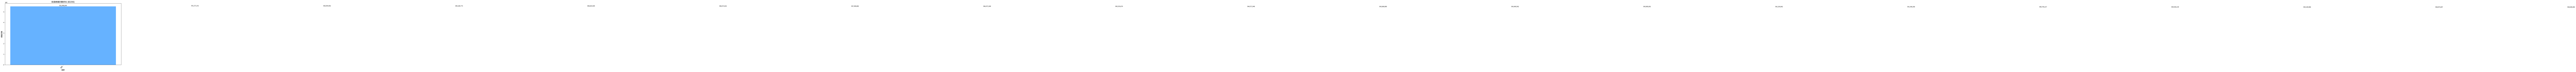


前20名國家總確診數：
--------------------------------------------------
國家      總確診數
全球 552498044
全球 551271311
全球 550044902
全球 549180773
全球 548824569
全球 548472821
全球 547498882
全球 546472348
全球 545533674
全球 544571946
全球 543680800
全球 543400592
全球 543085001
全球 542329842
全球 541548358
全球 540744217
全球 539928134
全球 539140986
全球 538874697
全球 538648484


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib as mlp

# 設定中文字體
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 讀取資料
df = pd.read_csv('world.csv')

# 依總確診數排序（由高至低）
df_sorted = df.sort_values('總確診數', ascending=False)

# 創建圖表
plt.figure(figsize=(15, 8))

# 繪製直方圖
plt.bar(df_sorted['國家'].head(20), df_sorted['總確診數'].head(20), color='#66B2FF')

# 設定圖表標題和標籤
plt.title('各國總確診數排名 (前20名)', fontsize=14)
plt.xlabel('國家', fontsize=12)
plt.ylabel('總確診數', fontsize=12)

# 設定 X 軸標籤旋轉
plt.xticks(rotation=45, ha='right')

# 在長條上方顯示數值
for i, v in enumerate(df_sorted['總確診數'].head(20)):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

# 調整版面配置
plt.tight_layout()

# 顯示圖表
plt.show()

# 顯示數據
print("\n前20名國家總確診數：")
print("-" * 50)
print(df_sorted[['國家', '總確診數']].head(20).to_string(index=False))

In [2]:
import pandas as pd

def get_country_data(filepath, country_name):
    """
    從指定的 CSV 檔案中提取指定國家的資料。

    Args:
        filepath: CSV 檔案的路徑。
        country_name: 要尋找的國家名稱（字串）。

    Returns:
        一個 pandas DataFrame，包含指定國家的資料，如果找不到則返回空的 DataFrame。
    """
    try:
        df = pd.read_csv(filepath, encoding='utf-8')
    except FileNotFoundError:
        print(f"找不到檔案：{filepath}")
        return pd.DataFrame()
    except UnicodeDecodeError:
        print(f"檔案編碼錯誤，請確認檔案編碼是否為 utf-8")
        return pd.DataFrame()

    country_data = df[df['國家'] == country_name]

    if country_data.empty:
        print(f"在檔案中找不到關於 {country_name} 的資料。")

    return country_data

# 檔案路徑
file_path = r'c:\Users\bigpa\Documents\github\python_analysis\world.csv'  # 填入你的實際路徑

# 讓使用者輸入國家名稱
input_country = input("請輸入要查詢的國家名稱：")

# 取得國家資料
country_info = get_country_data(file_path, input_country)

# 印出結果
if not country_info.empty:
    print(country_info)
import pandas as pd

def get_selected_country_data(filepath, country_name, selected_columns):
    """
    從指定的 CSV 檔案中提取指定國家的特定欄位資料。

    Args:
        filepath: CSV 檔案的路徑。
        country_name: 要尋找的國家名稱（字串）。
        selected_columns: 要顯示的欄位名稱列表。

    Returns:
        一個 pandas DataFrame，包含指定國家的特定欄位資料，如果找不到則返回空的 DataFrame。
    """
    try:
        df = pd.read_csv(filepath, encoding='utf-8')
    except FileNotFoundError:
        print(f"找不到檔案：{filepath}")
        return pd.DataFrame()
    except UnicodeDecodeError:
        print(f"檔案編碼錯誤，請確認檔案編碼是否為 utf-8")
        return pd.DataFrame()

    country_data = df[df['國家'] == country_name]

    if country_data.empty:
        print(f"在檔案中找不到關於 {country_name} 的資料。")
        return pd.DataFrame()
    
    # 確認要選取的欄位存在
    for col in selected_columns:
        if col not in df.columns:
          print(f"欄位'{col}'不存在於資料表中")
          return pd.DataFrame()

    return country_data[selected_columns]

# 檔案路徑
file_path = r'c:\Users\bigpa\Documents\github\python_analysis\world.csv'  # 填入你的實際路徑

# 要顯示的欄位
selected_columns = ['洲名', '國家', '日期', '總確診數', '總死亡數']

# 讓使用者輸入國家名稱
input_country = input("請輸入要查詢的國家名稱：")

# 取得國家資料
country_info = get_selected_country_data(file_path, input_country, selected_columns)

# 印出結果
if not country_info.empty:
    print(country_info)


            ID iso_code  洲名  國家          日期     總確診數  新增確診數  七天移動平均新增確診數  \
163986  163987      TWN  亞洲  台灣  2020-01-16        0      0        0.000   
163987  163988      TWN  亞洲  台灣  2020-01-17        0      0        0.000   
163988  163989      TWN  亞洲  台灣  2020-01-18        0      0        0.000   
163989  163990      TWN  亞洲  台灣  2020-01-19        0      0        0.000   
163990  163991      TWN  亞洲  台灣  2020-01-20        0      0        0.000   
...        ...      ...  ..  ..         ...      ...    ...          ...   
164884  164885      TWN  亞洲  台灣  2022-07-02  3837856  34807    37736.143   
164885  164886      TWN  亞洲  台灣  2022-07-03  3870528  32672    36740.429   
164886  164887      TWN  亞洲  台灣  2022-07-04  3893643  23115    35960.286   
164887  164888      TWN  亞洲  台灣  2022-07-05  3929627  35984    34755.571   
164888  164889      TWN  亞洲  台灣  2022-07-06  3964188  34561    33689.286   

        總死亡數  新增死亡數  ...  七天移動平均疫苗新增接種劑數  每百人接種疫苗劑數  每百人接種疫苗人數  疫情控管指數  \
163986     0 